In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


/home/negi/.virtualenvs/env1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/negi/.virtualenvs/env1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### `Read data`

In [2]:
##ead data
df=pd.read_csv('jester-data-1.csv',header=None)
df.head()
data=df.iloc[:15000,1:]
n,m=data.shape
#print(n,m)

### `Gauge Set creation and normalization`

In [3]:
##create gauge set G
gauge_set=[]
invalid=99.00
temp=[]
mu=[]
for col in data:
    vals=list(data[col])
    if vals.count(invalid)<=10:
        gauge_set.append(col)
        temp.append(vals)
        mu.append(sum(vals)/len(vals)) #calculate mu-mean rating over all users for each item in G
G=np.array(temp).T
A=G #normalized Gauge matrix
G=pd.DataFrame(G)
gauge_set=set(gauge_set)
recommender_set=set(data)-gauge_set

In [4]:
##normalize Gauge set

for j in range(A.shape[1]):
    #variance calculation for item
    variance=0
    for raw_rating in A[:,j]:
        diff=raw_rating-mu[j]
        variance+=diff*diff
    variance/=n-1
    #normalizing raw rating in G
    k=0
    for raw_rating in A[:,j]:
        A[k][j]=(raw_rating-mu[j])/math.sqrt(variance)
        k+=1
#A=pd.DataFrame(A)
A

array([[-1.4462051 , -1.63900951,  0.961432  , ..., -1.97107472,
        -1.74504182,  0.06965373],
       [-0.51607603, -0.05608695, -0.93008937, ...,  0.58035265,
        -0.10168618, -0.03455931],
       [ 1.54866576,  1.6379179 ,  1.97581255, ...,  1.6921153 ,
         1.84599458,  0.73959469],
       ...,
       [ 0.94245323,  0.44899031,  1.12651747, ...,  0.92959746,
        -0.07505773, -0.93206753],
       [-1.49144484, -0.88226145,  0.82817025, ...,  0.26021157,
        -0.58290027, -0.96396948],
       [ 0.83749703, -0.16543357,  1.18419793, ...,  0.52408543,
        -0.14923698,  0.52266143]])

### `PCA using Pearson's correlation coefficient`

In [5]:
##find Pearson's correlation matrix

C=np.matmul(A.T,A)/(n-1)
C

array([[1.        , 0.17784688, 0.16508458, 0.17345203, 0.12133308,
        0.17613535, 0.2219358 , 0.18348836, 0.23455651, 0.23229098,
        0.14925674],
       [0.17784688, 1.        , 0.20157584, 0.16158681, 0.2290041 ,
        0.12471974, 0.21293915, 0.21606296, 0.23920943, 0.28426775,
        0.22199742],
       [0.16508458, 0.20157584, 1.        , 0.21099967, 0.20750492,
        0.14836142, 0.22413308, 0.14781349, 0.11063726, 0.14999053,
        0.1178899 ],
       [0.17345203, 0.16158681, 0.21099967, 1.        , 0.26035496,
        0.15575452, 0.19065622, 0.16251028, 0.14306438, 0.11827356,
        0.16745709],
       [0.12133308, 0.2290041 , 0.20750492, 0.26035496, 1.        ,
        0.17994928, 0.10176549, 0.20397327, 0.1185281 , 0.09570245,
        0.15720683],
       [0.17613535, 0.12471974, 0.14836142, 0.15575452, 0.17994928,
        1.        , 0.08842363, 0.3448752 , 0.2693763 , 0.20283548,
        0.08505381],
       [0.2219358 , 0.21293915, 0.22413308, 0.19065622, 0.

In [6]:
##eigen analysis of Correlation matrix

# E is eigen value list
# V is eigen vector matrix--each column is a vector
E,V=np.linalg.eig(C) 

#checking eigen analysis--(Correlation matrix*eigen vector=eigen value*eigen vector)- must be true
for i in range(V.shape[1]):
    LHS=np.matmul(C,V[:,i].T)
    RHS=np.array([E[i]*v for v in V[:,i]])
    if np.array_equal(LHS,RHS):
        print('Eigen values are incorrect')

#print(LHS,RHS)
for i in range(V.shape[1]):
    print('eigen value=',E[i],'\n','eigen vector=',V[:,i])
    print()
 


eigen value= 2.9085112980379724 
 eigen vector= [-0.29257938 -0.3252531  -0.26293466 -0.27056802 -0.26354649 -0.29054337
 -0.25710445 -0.34674751 -0.36431759 -0.3472215  -0.26975401]

eigen value= 1.2080789822351183 
 eigen vector= [-0.02289476 -0.10727227 -0.39468886 -0.38770339 -0.32432112  0.26276623
 -0.3457197   0.3275404   0.40191392  0.33098514 -0.09876336]

eigen value= 1.059684012233996 
 eigen vector= [ 0.23141534  0.18118216 -0.06564766 -0.24121821 -0.47410222 -0.44044046
  0.45055036 -0.30562588  0.12944412  0.27654577  0.20670573]

eigen value= 0.927919679179273 
 eigen vector= [-0.43933789  0.35477062 -0.28657114 -0.05468415  0.26218915 -0.32648118
 -0.25630456  0.08340264  0.00355166  0.01631084  0.58970065]

eigen value= 0.5444100634165372 
 eigen vector= [ 0.0160927   0.14079494  0.1255903  -0.01767515 -0.03445878  0.01704936
 -0.12973873 -0.29710114  0.7189366  -0.5833563   0.00887441]

eigen value= 0.8403898491601476 
 eigen vector= [ 0.34268586 -0.4665234  -0.478118

In [7]:
##Dimension reduction

#sorting eigen vectors w.r.t eigen values
eigen_pairs=[(np.abs(E[i]),V[:,i]) for i in range(V.shape[0])]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

#reducing to 2 dimensions, so picking top 2 values in sorted list
D=2
selected=[eigen_pairs[i][1] for i in range(D)]
W = np.vstack(tuple(selected)).T 
print('Tranforming Matrix W:\n',W)


Tranforming Matrix W:
 [[-0.29257938 -0.02289476]
 [-0.3252531  -0.10727227]
 [-0.26293466 -0.39468886]
 [-0.27056802 -0.38770339]
 [-0.26354649 -0.32432112]
 [-0.29054337  0.26276623]
 [-0.25710445 -0.3457197 ]
 [-0.34674751  0.3275404 ]
 [-0.36431759  0.40191392]
 [-0.3472215   0.33098514]
 [-0.26975401 -0.09876336]]


In [8]:
##transforming data samples(the Normalized Gauge set)

def PCA(row):
    return np.matmul(W.T,row)
    
transformed=A
transformed=np.apply_along_axis( PCA, axis=1, arr=transformed )
#print(transformed.shape)
print(transformed)

[[ 3.81419786 -1.14317803]
 [-0.79376625 -0.57438716]
 [-3.3719114   0.62308212]
 ...
 [-1.42096943 -0.32579802]
 [ 0.8620055  -0.5879922 ]
 [-0.26679134  0.78701962]]


### `Visualing data after PCA`

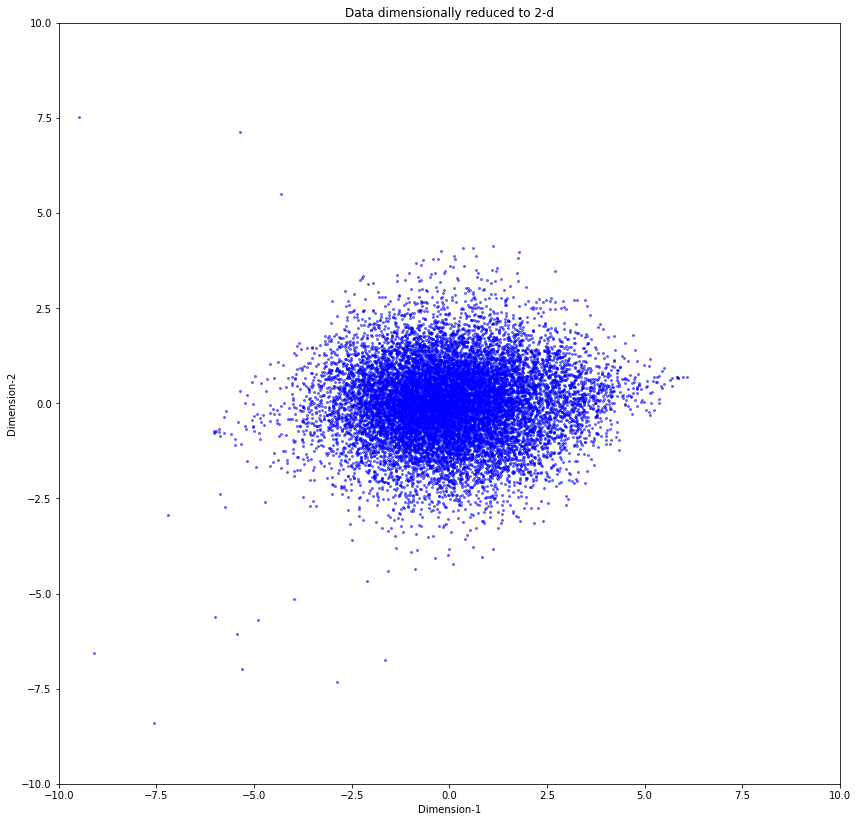

In [9]:
##visualizing data in eigen space(2D)

plt.figure(figsize=(14,14))
plt.plot(transformed[:,0], transformed[:,1], 'o', markersize=2, color='blue', alpha=0.5)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel('Dimension-1')
plt.ylabel('Dimension-2')
plt.title('Data dimensionally reduced to 2-d')
plt.show()

> **Data is dense. Visual patterns not detected.**

### `Clustering users by Kmeans`

In [10]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score

##find optimal K i.e. number of clusters
kval=[]
cost=[]
for k in range (20, 40):
    km = KMeans(n_clusters=k, random_state=1).fit(transformed)
    labels=km.labels_
    scr= metrics.silhouette_score(transformed, labels, metric='euclidean')
    kval.append(k)
    cost.append(scr)


Text(0.5,1,'Elbow Curve using silhouette score as metric')

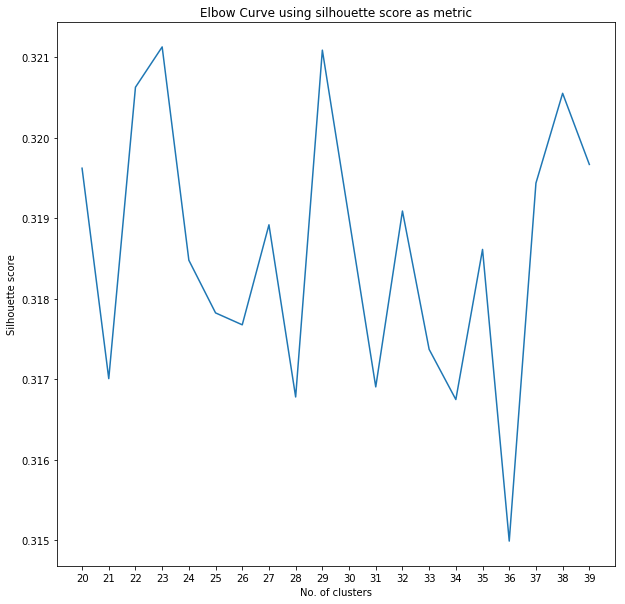

In [11]:
plt.figure(figsize=(10,10))
plt.xticks(kval)
plt.plot(kval,cost)
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette score')
plt.title('Elbow Curve using silhouette score as metric')

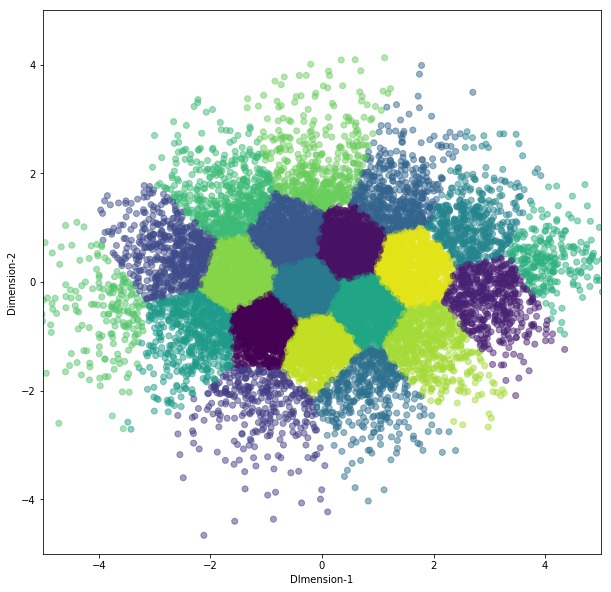

In [12]:
K=cost.index(max(cost))+20
km=KMeans(n_clusters=K, random_state=1).fit(transformed)
y_pred=km.labels_

plt.figure(figsize=(10,10))
plt.scatter(transformed[:,0],transformed[:,1],c=y_pred,alpha=0.5)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('DImension-1')
plt.ylabel('Dimension-2')
plt.show()

### `Find recommendations for each cluster of users`

In [13]:
##club users into clusters
user_clusters={}
for i,e in enumerate(y_pred):
    if e is None:
        pass
    if e not in user_clusters:
        user_clusters[e]=[[i]]
    else:
        user_clusters.get(e)[0].append(i)


In [14]:
##calculate top recommended items in each cluster

for cluster in user_clusters:
    top_recs=[]
    
    for col in recommender_set:
        mean=0
        tot=0
        for user in user_clusters.get(cluster)[0]:
            if data.loc[user,col]!=invalid:
                mean+=data.loc[user,col]
                tot+=1
        if tot==0:
            mean=0
        else:
            mean/=tot
        top_recs.append((col,mean))
    top_recs.sort(key=lambda x: x[1], reverse=True)
    user_clusters.get(cluster).append(top_recs)
    
            

### `Recommend for new user`

In [15]:
##tranform the gauge set for test data by PCA, and cluster with existeing clusters 
def recommend(testdata,top):
    test_G=testdata.drop(list(recommender_set),axis=1)
    test_transformed=np.apply_along_axis( PCA, axis=1, arr=test_G )
    closest_clusters=km.predict(test_transformed)
    print('New user \tTop %d jokes for you'%top)
    for testuser,cluster in enumerate(closest_clusters):
        picks=user_clusters.get(cluster)[1][:top]
        final=[]
        for pick in picks:
            final.append(pick[0])
        print(testuser+base,'\t',final)
    return closest_clusters


In [16]:
##set test data
testsize=100
base=20000
testdata=df.iloc[base:base+testsize+1,1:]
top=2
closest_clusters=recommend(testdata,top)


New user 	Top 2 jokes for you
20000 	 [89, 62]
20001 	 [89, 62]
20002 	 [36, 35]
20003 	 [29, 36]
20004 	 [88, 76]
20005 	 [29, 36]
20006 	 [29, 36]
20007 	 [89, 62]
20008 	 [36, 35]
20009 	 [29, 27]
20010 	 [88, 76]
20011 	 [29, 36]
20012 	 [76, 89]
20013 	 [76, 89]
20014 	 [88, 76]
20015 	 [76, 89]
20016 	 [89, 32]
20017 	 [89, 29]
20018 	 [62, 32]
20019 	 [29, 27]
20020 	 [76, 89]
20021 	 [36, 35]
20022 	 [36, 35]
20023 	 [88, 76]
20024 	 [76, 89]
20025 	 [62, 32]
20026 	 [93, 24]
20027 	 [89, 62]
20028 	 [76, 89]
20029 	 [89, 29]
20030 	 [89, 62]
20031 	 [76, 89]
20032 	 [36, 35]
20033 	 [76, 89]
20034 	 [36, 35]
20035 	 [62, 32]
20036 	 [89, 36]
20037 	 [36, 35]
20038 	 [76, 89]
20039 	 [62, 32]
20040 	 [29, 27]
20041 	 [29, 27]
20042 	 [76, 89]
20043 	 [29, 27]
20044 	 [36, 35]
20045 	 [89, 29]
20046 	 [76, 89]
20047 	 [89, 62]
20048 	 [62, 32]
20049 	 [36, 35]
20050 	 [88, 76]
20051 	 [93, 24]
20052 	 [89, 62]
20053 	 [62, 32]
20054 	 [88, 76]
20055 	 [62, 32]
20056 	 [88, 76]
2

### `Validate recommendation`

In [17]:
def validate(testdata,closest_clusters):
    MAE=0
    for testuser,cluster in enumerate(closest_clusters):
        picks=user_clusters.get(cluster)[1]
        mae=0
        i=0
        for pick in picks:
            col,pred_rating=pick
            actual_rating=testdata.loc[testuser+base,col]
            if actual_rating==invalid:
                continue
            i+=1
            mae+=abs(actual_rating-pred_rating)
        mae/=i
        MAE+=mae
    MAE/=testdata.shape[0]
    return MAE

In [18]:
MAE=validate(testdata,closest_clusters)
print('MAE for test users=',MAE)
print('NMAE for test user=',MAE/20)

MAE for test users= 4.104843591533714
NMAE for test user= 0.20524217957668572
